In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm # OLS module for linear regression
from ising import *
from graph_utils import *

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_5150/3208849690.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Ising on Barabasi - Albert Networks

## Investigation of the relaxation process at fixed temperature

Preliminary step necessary to undersand how many equilibration steps are needed

In [5]:
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
print(mean_field_temperature)
G = nx.barabasi_albert_graph(num_nodes, m)
a = get_dense_adj_matrix(G)

2.995732273553991


In [39]:
frac_temp = [0.4]
#frac_temp = [0.2, 0.4, 0.6, 0.8, 1.2, 1.4]
trial_temps = [f * mean_field_temperature for f in frac_temp]
n_step = 3000
for chosen_temp in trial_temps:
    initial_state, final_state, df = simulate_ising_fixed_temp(adjacency_matrix= a, T = chosen_temp, num_steps= n_step)
    df.to_csv(f"outputs_csv/BA_results_num_nodes_{num_nodes}_temp_{chosen_temp:.2f}_steps_{n_step}.csv")

temperature 1.1159459651972445, step number 0
temperature 1.1159459651972445, step number 1000
temperature 1.1159459651972445, step number 2000
temperature 1.6739189477958665, step number 0
temperature 1.6739189477958665, step number 1000
temperature 1.6739189477958665, step number 2000
temperature 2.231891930394489, step number 0
temperature 2.231891930394489, step number 1000
temperature 2.231891930394489, step number 2000


2.995732273553991


FileNotFoundError: [Errno 2] No such file or directory: 'BA_results_num_nodes_400_temp_1.50.csv'

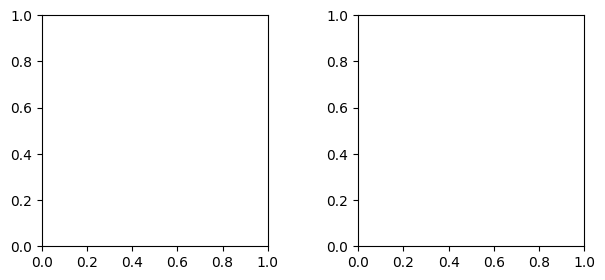

In [13]:
# Single Plot
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
temp = 1.50
frac = temp / mean_field_temperature
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize = (7, 3))
plt.subplots_adjust(hspace= 0.4, wspace = 0.4)
df = pd.read_csv("BA_results_num_nodes_400_temp_1.50.csv")
ax1.plot(df['n_step'], np.abs(df['average_magnetization']))
ax1.set_xlabel("time step")
ax1.set_ylabel("abs(magnetization)")
ax1.grid()
ax2.plot(df['n_step'], df['energy'])
ax2.set_xlabel("time step")
ax2.set_ylabel(r"energy E")
ax2.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac}\,T_C$')
ax2.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

2.995732273553991


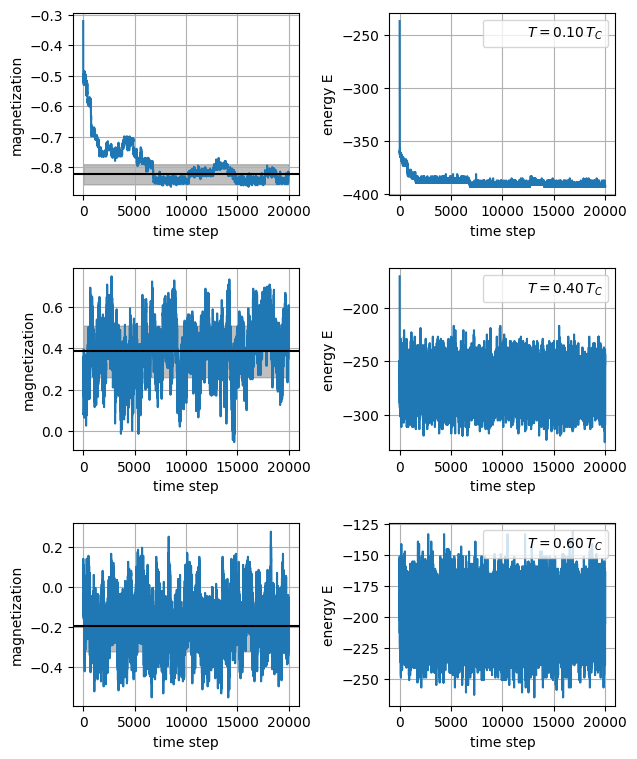

In [34]:
#Aggregated Plot
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
print(mean_field_temperature)

plot_frac = np.array([0.4, 0.6, 0.8])
plot_temp = plot_frac * mean_field_temperature
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 3, ncols= 2, figsize = (7,9))
plt.subplots_adjust(hspace= 0.4, wspace = 0.4)

temp = 0.3
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_0.30.csv")
ax1.plot(df['n_step'], df['average_magnetization'])

x_start = 5000
x_end = 10000
mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax1.axhline( y = mean, c = 'black')
ax1.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)

ax1.set_xlabel("time step")
ax1.set_ylabel("magnetization")
ax1.grid()
ax2.plot(df['n_step'], df['energy'])
ax2.set_xlabel("time step")
ax2.set_ylabel(r"energy E")
ax2.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax2.legend(handles=[invisible_line], labels=[invisible_line.get_label()])


temp = 1.2
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_1.20.csv")
ax3.plot(df['n_step'], df['average_magnetization'])
mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax3.axhline( y = mean, c = 'black')
ax3.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)
ax3.set_xlabel("time step")
ax3.set_ylabel("magnetization")
ax3.grid()

ax4.plot(df['n_step'], df['energy'])
ax4.set_xlabel("time step")
ax4.set_ylabel(r"energy E")
ax4.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax4.legend(handles=[invisible_line], labels=[invisible_line.get_label()])



temp = 1.8
frac = temp / mean_field_temperature
df = pd.read_csv(f"outputs_csv/BA_results_num_nodes_400_temp_1.80.csv")
ax5.plot(df['n_step'], df['average_magnetization'])

mean = np.mean(df['average_magnetization'].iloc[x_start: x_end])
std =  np.std(df['average_magnetization'].iloc[x_start:x_end])          
ax5.axhline( y = mean, c = 'black')
ax5.fill_between(x=df['n_step'], y1=mean - std, y2=mean + std, color='gray', alpha=0.5)

ax5.set_xlabel("time step")
ax5.set_ylabel("magnetization")
ax5.grid()
ax6.plot(df['n_step'], df['energy'])
ax6.set_xlabel("time step")
ax6.set_ylabel(r"energy E")
ax6.grid()
invisible_line = plt.Line2D([], [], linestyle="none", label=fr'$T = {frac:.2f}\,T_C$')
ax6.legend(handles=[invisible_line], labels=[invisible_line.get_label()])

plt.savefig(f"figures/BA_relaxation_{num_nodes}_steps_{len(df)}.pdf")

## Determination of the Critical Temperature
three methods can be used, and can be compared to improve the accuracy of the estimation:

- magnetization threshold
- curve fitting of the heat and susceptibility peaks
- calculation of the inflection point in energy function

In [35]:
num_nodes = 400
m = 1
mean_field_temperature = (m / 2) * np.log(num_nodes)
G = nx.barabasi_albert_graph(num_nodes, m)
a = get_dense_adj_matrix(G)
print(mean_field_temperature)

2.995732273553991


In [22]:
T_i = 0.3 * mean_field_temperature
T_f = 1.2 * mean_field_temperature
t_points = 100
eq_steps = 5000
sw_steps = 5000
df = simulate_ising(a, T_i, T_f, t_points=t_points, equilibration_steps=eq_steps, sweep_steps=sw_steps)
df.to_csv(f"outputs_csv/BA_scaling_num_nodes_{num_nodes}_t_points_{t_points}_steps_{sw_steps}.csv")

temperature 1.2130075659799042, point 1/100
temperature 1.458059599511198, point 11/100
temperature 1.703111633042492, point 21/100
temperature 1.9481636665737856, point 31/100
temperature 2.1932157001050796, point 41/100
temperature 2.4382677336363736, point 51/100
temperature 2.683319767167667, point 61/100
temperature 2.9283718006989607, point 71/100
temperature 3.173423834230255, point 81/100
temperature 3.4184758677615488, point 91/100


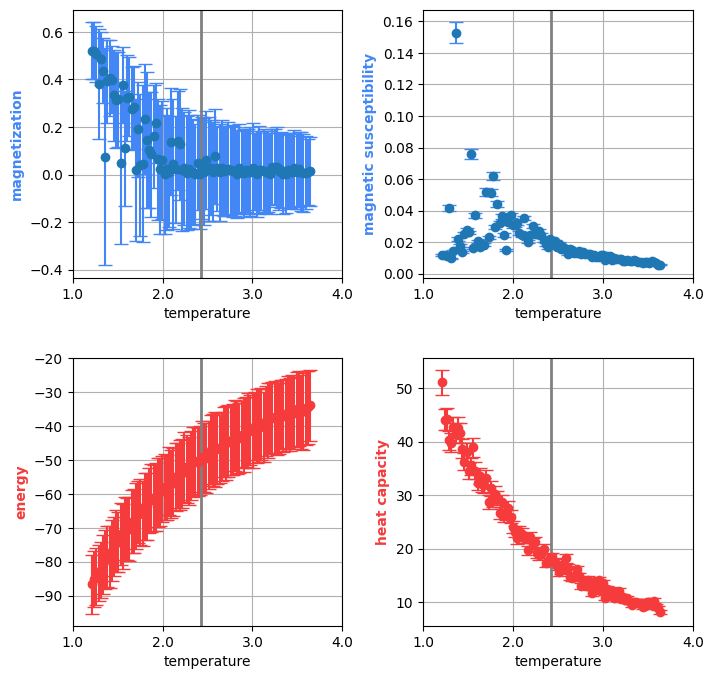

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
tick_labels = np.arange(np.floor((np.min(df['temperature']))), np.floor(np.max(df['temperature'])) + 2)
formatted_tick_labels = [f"{label:.1f}" for label in tick_labels]


ax1.errorbar(df['temperature'], df['abs_magnetization'], yerr = df['std_magnetization'], fmt='o', ecolor=my_blue, capsize=5)
ax1.set_xlabel("temperature")
ax1.set_xticks(tick_labels)
ax1.set_xticklabels(formatted_tick_labels, fontsize=10)

ax1.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax1.set_ylabel("magnetization", color = my_blue, fontweight='bold')
ax1.grid()

ax2.errorbar(df['temperature'], df['susceptibility'], yerr = df['std_susceptibility'], fmt='o', ecolor=my_blue, capsize=5)
ax2.set_xlabel("temperature")
ax2.set_xticks(tick_labels)
ax2.set_xticklabels(formatted_tick_labels, fontsize=10)
ax2.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax2.set_ylabel("magnetic susceptibility", color = my_blue, fontweight='bold')
ax2.grid()

ax3.errorbar(df['temperature'], df['energy'], yerr = df['std_energy'], fmt='o', color = my_red, ecolor=my_red, capsize=5)
ax3.set_xlabel("temperature")
ax3.set_xticks(tick_labels)
ax3.set_xticklabels(formatted_tick_labels, fontsize=10)
ax3.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax3.set_ylabel("energy", color = my_red, fontweight='bold')
ax3.grid()

ax4.errorbar(df['temperature'], df['heat'], yerr = df['std_heat'], fmt='o', color = my_red, ecolor= my_red, capsize=5)
ax4.set_xlabel("temperature")
ax4.set_xticks(tick_labels)
ax4.set_xticklabels(formatted_tick_labels, fontsize=10)
ax4.axvline(x = mean_field_temperature, color='grey', linestyle='-', linewidth=2)
ax4.set_ylabel("heat capacity", color = my_red, fontweight='bold')
ax4.grid()
plt.savefig(f"figures/BA_scaling_num_nodes_{num_nodes}_t_points_{t_points}_steps_1000.pdf")

In [ ]:
Tc_average, Tc_std = estim


# m scaling at fixed size

In [ ]:
num_nodes = 200
m_s = np.array[(1,2,3,4,5)]
mean_field_temperatures = (m / 2) * np.log(num_nodes)
for m in m_s:
    G = nx.barabasi_albert_graph(num_nodes, m)
    a = get_dense_adj_matrix(G)
    T_i = 0.5 * mean_field_temperature
    T_f = 1.5 * mean_field_temperature
    t_points = 100
    df = simulate_ising(a, T_i, T_f, t_points=t_points, equilibration_steps=1000, sweep_steps=1000)
    df.to_csv(f"outputs_csv/BA_mscaling_num_nodes_{num_nodes}_m_{m}_t_points_{t_points}.csv")
    Tc_average, Tc_std = estimate_temperature(df)